# KBO 외국인 투수 스카우팅 최적화

- fangraphs : 정규 시즌별 기록  
- statcast : 경기별 기록

In [3]:
import pandas as pd 

atkbo_1118_kboregssn = pd.read_csv('kbo_yearly_foreigners_2011_2018.csv') # 역대 정규시즌 성적
atkbo_1118_mlbtot = pd.read_csv('fangraphs_foreigners_2011_2018.csv') # mlb에서의 성적
atkbo_19_mlbtot = pd.read_csv('fangraphs_foreigners_2019.csv') # 19년에 kbo에 입성한 투수들의 mlb에서의 성적

In [4]:
print(atkbo_1118_kboregssn.shape)
print(atkbo_1118_mlbtot.shape)
print(atkbo_19_mlbtot.shape)

(105, 11)
(205, 19)
(41, 19)


In [5]:
print(atkbo_1118_kboregssn.columns)
print(atkbo_1118_mlbtot.columns)
print(atkbo_19_mlbtot.columns)

Index(['pitcher_name', 'year', 'team', 'ERA', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'year_born'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')


In [10]:
pd.read_csv('variables.csv')

,columns_names,meaning
0,pitcher_name,투수 이름
1,year,연도
2,team,소속 팀
3,ERA,평균 자책점(Earned run average)
4,WAR,대체 선수 대비 승리 기여도(Wins above replacement)
5,TBF,상대한 타자 수(Total betters faced)
6,H,피안타 수(Hits)
7,HR,피홈런 수(Home runs)
8,BB,피볼넷 수(Bases on balls)
9,HBP,피사구 수(Hit by pitch)


              ERA         TBF
count  105.000000  105.000000
mean     4.714286  558.980952
std      1.733072  224.436816
min      2.380000   40.000000
25%      3.740000  349.000000
50%      4.420000  622.000000
75%      5.230000  758.000000
max     15.750000  870.000000


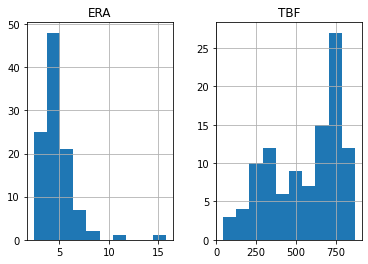

In [11]:
# kbo 정규 시즌의 ERA, TBF 확인
atkbo_1118_kboregssn[['ERA', 'TBF']].hist()
print(atkbo_1118_kboregssn[['ERA', 'TBF']].describe())

ERA의 평균은 4.71이며 왼쪽으로 치우쳐있음

TBF의 평균은 558.98이며 분포가 오른쪽으로 치우져있음

              ERA         TBF
count  205.000000  205.000000
mean     5.750585  193.160976
std      3.404285  186.000312
min      0.000000    4.000000
25%      4.050000   57.000000
50%      5.200000  126.000000
75%      6.750000  263.000000
max     27.000000  827.000000


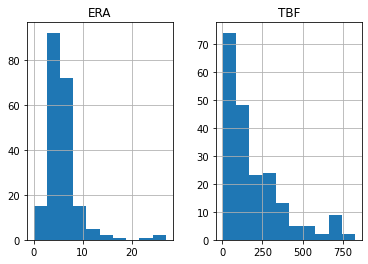

In [12]:
# mbl에서 ERA, TBF 확인
atkbo_1118_mlbtot[['ERA', 'TBF']].hist()
print(atkbo_1118_mlbtot[['ERA', 'TBF']].describe())

ERA의 평균은 5.75이며 왼쪽으로 치우쳐있음

TBF의 평균은 193.16이며 분포가 왼쪽으로 치우져있음

MLB에서 TBF의 값의 평균이 낮고 왼쪽으로 치우쳐있는 이유는 KBO의 선발 투수들이 MLB에서는 선발 투수가 아니었기 때문(주로 불펜)

투수를 평가할 때 사용할 수 있는 대표적인 지표로는 ERA가 있는데, MLB에서 ERA가 낮을수록 KBO에서도 낮을 것이라는 것이 증명된다면 외국인 투수를 선발할 때 ERA가 낮은 투수 위주로 스카우트하면 될 것이다.

In [25]:
m_mean = (atkbo_1118_mlbtot.groupby('pitcher_name')['ERA'].mean().
          reset_index().rename(columns = {'ERA':'MLB_mean'}))

k_mean = (atkbo_1118_kboregssn.groupby('pitcher_name')['ERA'].mean().
          reset_index().rename(columns = {'ERA':'KBO_mean'}))

df = pd.merge(m_mean, k_mean, how = 'inner', on = 'pitcher_name')
df

,pitcher_name,MLB_mean,KBO_mean
0,니퍼트,4.290000,3.687500
1,다이아몬드,10.262500,4.420000
2,듀브론트,5.106667,4.920000
3,레나도,7.306667,6.800000
4,레온,6.050000,11.250000
5,레이예스,12.956667,5.695000
6,레일리,6.640000,4.197500
7,로저스,5.771667,3.690000
8,루카스,5.687143,4.930000
9,리즈,4.240000,3.543333


          MLB_mean  KBO_mean
MLB_mean  1.000000  0.107744
KBO_mean  0.107744  1.000000


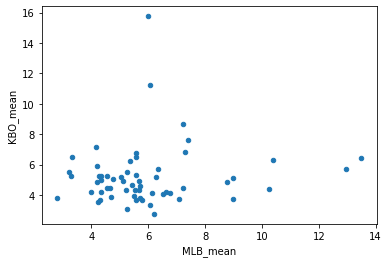

In [26]:
df.plot(kind = 'scatter', x = 'MLB_mean', y = 'KBO_mean')
print(df.corr())

MLB에서의 ERA로 KBO에서의 ERA를 예측하기는 어려워 보인다.

## 투수의 능력만을 반영한 새로운 지표 탐색 - Statcast

In [27]:
atkbo_1118_statcast = pd.read_csv('baseball_savant_foreigners_2011_2018.csv')
atkbo_19_statcast = pd.read_csv('baseball_savant_foreigners_2019.csv')

print(atkbo_1118_statcast.shape)
print(atkbo_19_statcast.shape)

(135753, 24)
(21903, 24)


In [29]:
print(atkbo_1118_statcast.columns)
print(atkbo_19_statcast.columns)

Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')
Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')


In [30]:
pd.read_csv('statcast_variables.csv')

,columns_names,meaning
0,game_date,경기 날짜
1,release_speed,구속(mile/h)
2,batter,타자
3,pitcher,투수
4,events,해당 타석 결과
5,description,해당 공의 결과
6,zone,공이 홈 플레이트를 지날 때의 위치
7,stand,타자의 손잡이
8,p_throws,투수의 손잡이
9,bb_type,타구의 유형


events, description, pitch_name 확인

In [31]:
atkbo_1118_statcast[['events' ,'description', 'pitch_name']]

,events,description,pitch_name
0,field_out,hit_into_play,4-Seam Fastball
1,home_run,hit_into_play_score,4-Seam Fastball
2,NaN,foul,4-Seam Fastball
3,NaN,blocked_ball,4-Seam Fastball
4,NaN,ball,4-Seam Fastball
...,...,...,...
135748,NaN,ball,4-Seam Fastball
135749,field_out,hit_into_play,Cutter
135750,NaN,called_strike,Cutter
135751,NaN,ball,4-Seam Fastball


event column에 기록된 값의 분포 확인

<AxesSubplot:>

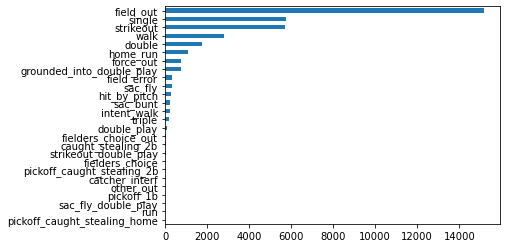

In [36]:
atkbo_1118_statcast['events'].value_counts().sort_values(ascending = True).plot(kind = 'barh')

description column에 기록된 값의 분포 확인

<AxesSubplot:>

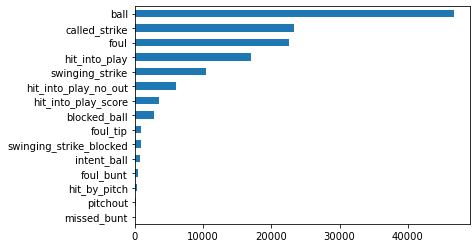

In [37]:
atkbo_1118_statcast['description'].value_counts().sort_values(ascending = True).plot(kind = 'barh')

pitch_name column에 기록된 값의 분포 확인

<AxesSubplot:>

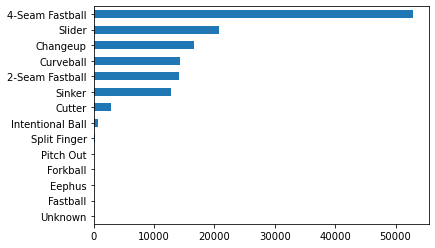

In [38]:
atkbo_1118_statcast['pitch_name'].value_counts().sort_values(ascending = True).plot(kind = 'barh')

## 데이터 전처리

#### 가설
kbo에서 우수한 활약을 보인 선수들은 MLB에서 제구력이 뛰어날 것이다

- 1. 대상은 누구인가?
- 2. 우수한 활약의 기준은 무엇인가?
- 3. 제구력은 어떻게 측정할 것인가?

이 가설은 MLB와 KBO 모두에서 투구 기록이 존재하는 투수만 가능 

In [39]:
atkbo_1118_kboregssn.head(10)

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
1,니퍼트,2012,두산,3.20,785,156,15,68,8,126,NaN
2,니퍼트,2013,두산,3.58,482,108,7,34,4,104,NaN
3,니퍼트,2014,두산,3.81,760,186,17,48,6,158,NaN
4,니퍼트,2015,두산,5.10,404,104,4,33,4,76,NaN
5,니퍼트,2016,두산,2.95,701,151,15,57,9,142,NaN
6,니퍼트,2017,두산,4.06,782,175,20,77,10,161,NaN
7,니퍼트,2018,KT,4.25,765,209,26,39,9,165,NaN
8,다이아몬드,2017,SK,4.42,581,163,11,35,9,59,NaN
9,듀브론트,2018,롯데,4.92,629,162,13,62,8,109,NaN


In [40]:
atkbo_1118_mlbtot.head(10)

,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
0,오간도,2011.0,3.51,3.3,693.0,149.0,16.0,43.0,7.0,126.0,1.14,0.265,3.65,0.237,0.364,0.674,0.147,0.090,0.475
1,험버,2011.0,3.75,3.2,676.0,151.0,14.0,41.0,6.0,116.0,1.18,0.275,3.58,0.168,0.471,0.458,0.094,0.092,0.463
2,루카스,2012.0,3.76,2.8,827.0,185.0,13.0,78.0,1.0,140.0,1.36,0.289,3.75,0.203,0.572,0.707,0.082,0.062,0.424
3,다이아몬드,2012.0,3.54,2.2,714.0,184.0,17.0,31.0,4.0,90.0,1.24,0.292,3.94,0.210,0.534,0.597,0.040,0.068,0.467
4,듀브론트,2013.0,4.32,2.2,705.0,161.0,13.0,71.0,5.0,139.0,1.43,0.310,3.78,0.199,0.456,0.633,0.127,0.077,0.434
5,스와잭,2017.0,2.33,2.2,303.0,58.0,6.0,22.0,2.0,91.0,1.03,0.286,2.74,0.155,0.439,0.485,0.145,0.142,0.500
6,듀브론트,2012.0,4.86,1.3,709.0,162.0,24.0,71.0,5.0,167.0,1.45,0.312,4.37,0.234,0.437,0.635,0.086,0.096,0.442
7,탈보트,2010.0,4.41,1.2,696.0,169.0,13.0,69.0,8.0,88.0,1.49,0.301,4.48,0.169,0.478,0.495,0.070,0.060,0.428
8,비야누에바,2011.0,4.04,1.2,454.0,103.0,11.0,32.0,4.0,68.0,1.26,0.271,4.10,0.219,0.356,0.462,0.151,0.078,0.433
9,비야누에바,2014.0,4.64,1.2,343.0,89.0,6.0,19.0,3.0,72.0,1.39,0.342,3.13,0.202,0.413,0.474,0.161,0.113,0.486


In [41]:
atkbo_1118_statcast.head(10)

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,...,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name
0,2010-10-09,93.0,425834.0,430962,field_out,hit_into_play,4.0,R,R,popup,...,-0.626,2.771,-6.404,26.077,-9.694,NaN,NaN,NaN,4-Seam Fastball,니퍼트
1,2010-10-09,95.2,150289.0,430962,home_run,hit_into_play_score,5.0,L,R,fly_ball,...,-0.112,2.401,-10.168,28.786,-8.895,NaN,NaN,NaN,4-Seam Fastball,니퍼트
2,2010-10-09,94.3,150289.0,430962,NaN,foul,2.0,L,R,NaN,...,0.272,3.052,-5.605,26.657,-7.794,NaN,NaN,NaN,4-Seam Fastball,니퍼트
3,2010-10-09,94.0,150289.0,430962,NaN,blocked_ball,13.0,L,R,NaN,...,-1.193,0.632,-9.099,30.273,-6.371,NaN,NaN,NaN,4-Seam Fastball,니퍼트
4,2010-10-09,92.8,150289.0,430962,NaN,ball,14.0,L,R,NaN,...,0.370,1.383,-5.846,27.290,-11.262,NaN,NaN,NaN,4-Seam Fastball,니퍼트
5,2010-10-09,80.8,150289.0,430962,NaN,foul_tip,13.0,L,R,NaN,...,-1.233,2.059,-10.897,18.539,-20.286,NaN,NaN,NaN,Changeup,니퍼트
6,2010-10-09,92.0,150289.0,430962,NaN,ball,9.0,L,R,NaN,...,0.510,1.722,-6.251,27.786,-10.031,NaN,NaN,NaN,4-Seam Fastball,니퍼트
7,2010-10-09,92.5,430632.0,430962,field_out,hit_into_play,13.0,L,R,line_drive,...,-1.010,2.212,-8.279,26.466,-8.376,NaN,NaN,NaN,4-Seam Fastball,니퍼트
8,2010-10-09,91.2,430632.0,430962,NaN,ball,13.0,L,R,NaN,...,-0.106,1.418,-9.239,25.490,-13.556,NaN,NaN,NaN,4-Seam Fastball,니퍼트
9,2010-10-09,91.8,430632.0,430962,NaN,ball,11.0,L,R,NaN,...,-1.426,2.971,-12.090,25.659,-15.250,NaN,NaN,NaN,2-Seam Fastball,니퍼트
